In [3]:
p = '/Users/formicarufa/Documents/Repos/RaySim/zmx/AC508-200-B-ML-Zemax(ZMX).zmx'

d_optics=50.8
prc=0.6

System: AC508-200-B AC508-200-B NEAR IR ACHROMATS: Infinite Conjugate 200
Scale: 1.0 mm
Wavelengths: 800 nm
Fields: 0, 0.2, 0.7
Object:
 Semi-Angle: 17.2 deg
 Pupil:
   Pupil Distance: 28.0877
   Refractive Index: 1.00028
   Radius: 15.24
Image:
 Radius: 0.014
 Update Radius: True
 Pupil:
   Pupil Distance: -193.143
   Refractive Index: 1.00028
   Update Radius: True
   Radius: 25.4
Stop: 4
Elements:
 # T   Distance   Rad Curv   Diameter          Material       n      nd      Vd
 0 S          0        inf        inf         basic/air   1.000   1.000   89.30
 1 S         10        inf      30.48         basic/air   1.000   1.000   89.30
 2 S         10        134       50.8    SCHOTT/N-LAK22   1.643   1.651   55.89
 3 S        8.2     -109.2       50.8    SCHOTT/N-SF6HT   1.784   1.805   25.36
 4 S          5     -515.2       50.8         basic/air   1.000   1.000   89.30
 5 S     193.26        inf   0.028023         basic/air   1.000   1.000   89.30

lagrange: -4.7941
track length: 23.

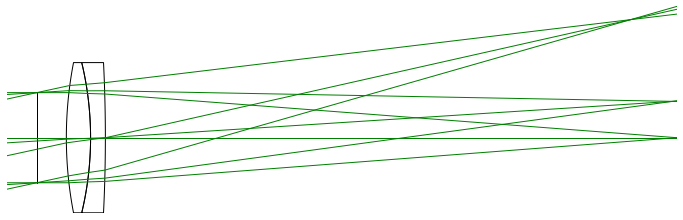

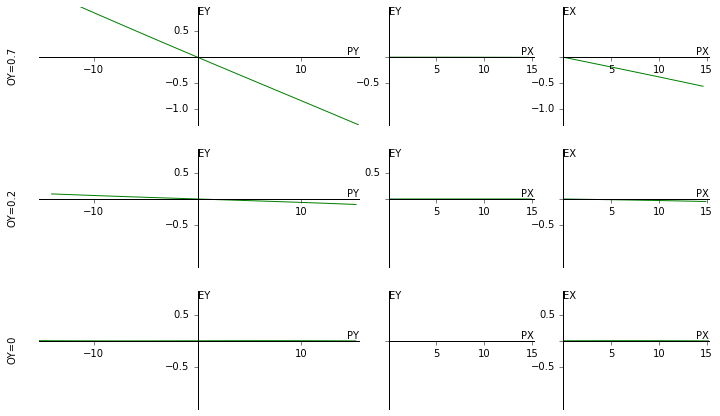

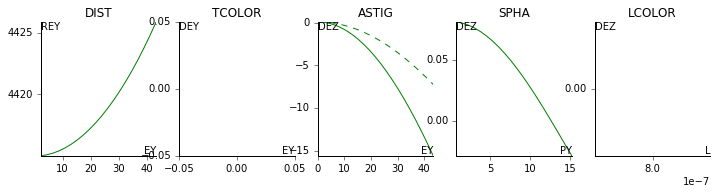

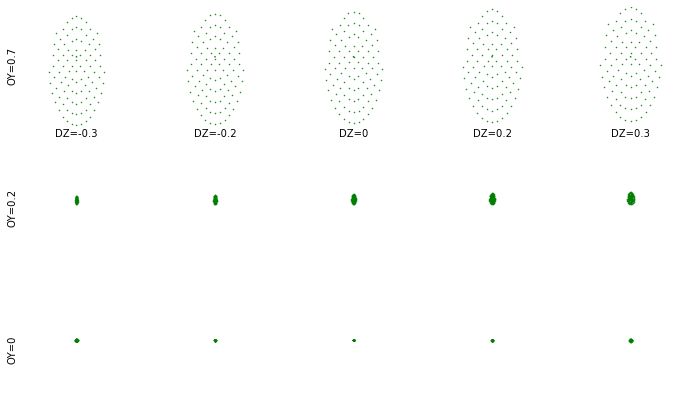

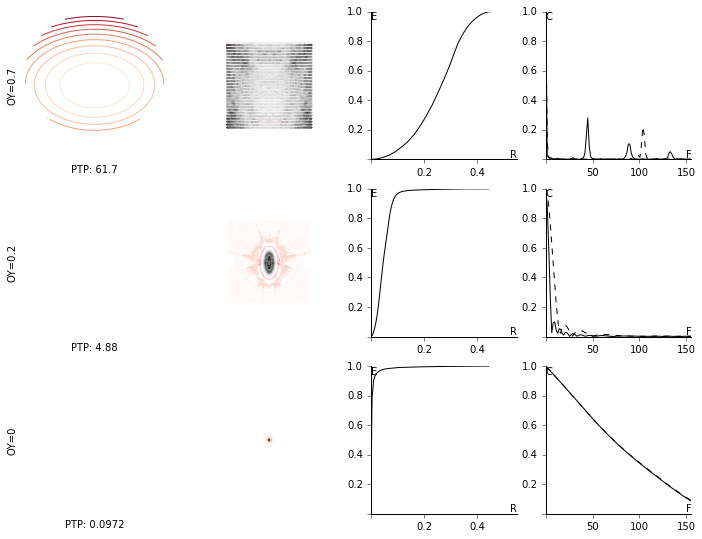

In [4]:
%matplotlib inline
import warnings
import numpy as np
import matplotlib.pyplot as plt
import StringIO
import rayopt as ro
import copy as cp
from matplotlib import patches
# ignore matplotlib and numpy warning each other
warnings.simplefilter("ignore", FutureWarning)
# ignore floating point exceptions
np.seterr(divide="ignore", invalid="ignore")
# by default only print 4 significant digits
np.set_printoptions(precision=4)
import io
from rayopt import zemax
from rayopt import FiniteConjugate
#del s

with open(p)  as f:
    lens = f.read()
s = zemax.zmx_to_system(lens)

# %


s.stop = 4
s.wavelengths = [800e-9]
s.object = ro.InfiniteConjugate(angle=0.3,pupil=ro.pupils.RadiusPupil(prc*d_optics/2))
s.object.update_radius=False
del s[1]
s.insert(1,ro.elements.Spheroid(distance=10,material='Basic/Air',radius=prc*d_optics/2))
s[2].distance=10
s.fields=[0,0.2,0.7]
s.update()
a_inf=ro.Analysis(s,refocus_full=True,resize_full=False,plot_paraxial=False)

f1=s[-1].distance



In [42]:
a_inf.figures[0].savefig('./'+str(np.random.randint(1e6))+'.png')
a_inf.figures[3].savefig('./'+str(np.random.randint(1e6))+'.png')

0.00642443850753


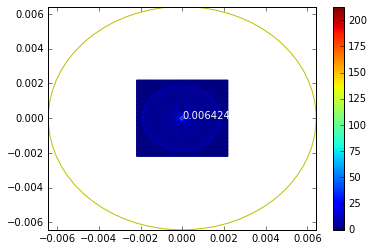

In [5]:
wi=800e-9
colors="grbcmyk"
r = s.paraxial.airy_radius[1]/s.paraxial.wavelength*wi
print r
t = ro.GeometricTrace(s)
t.rays_point((0, 0), wi, nrays=40000, distribution="hexapolar", clip=True)
# plot transverse image plane hit pattern (ray spot)
fig=plt.figure()
ax=fig.gca()
ax.add_patch(patches.Circle( (0, 0), r, edgecolor='y', facecolor="none"))
ax.annotate(str(r),(0,0),fontsize=10,color='w')
y = t.y[-1, :, :2] - t.y[-1, t.ref, :2]
plt.hexbin(y[:, 0], y[:, 1])
plt.colorbar()
plt.savefig('./'+str(np.random.randint(1e6))+'.png')

In [6]:
s.reverse()

190.008891425


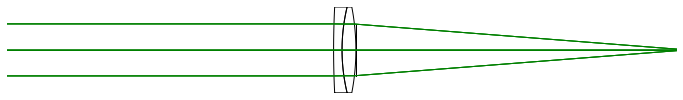

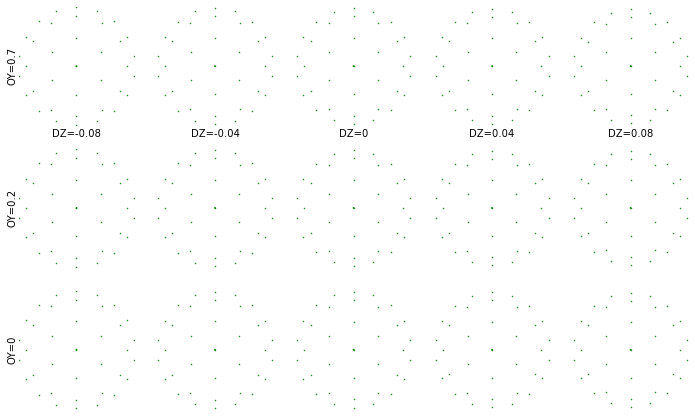

In [7]:

s[0].distance=200
s[4].distance=0
s[5].distance=500
s.object = ro.InfiniteConjugate(angle=0.2,pupil=ro.pupils.RadiusPupil(prc*d_optics))
s.image=ro.FiniteConjugate(radius=10)
s.object.update_radius=True
s.update()
a=ro.Analysis(s,refocus_full=True,plot_paraxial=False, resize_full=False,
              print_gaussian = False, print_system = False, print_paraxial = False,
              plot_transverse = False, plot_spots = True, plot_opds = False, plot_longitudinal = False)





print s[-1].distance

System: AC508-200-B AC508-200-B NEAR IR ACHROMATS: Infinite Conjugate 200
Scale: 1.0 mm
Wavelengths: 800 nm
Fields: 0, 0.5, 1
Object:
 Radius: 3
 Pupil:
   Pupil Distance: 4441.58
   Telecentric: True
   Refractive Index: 1.00028
   Update Radius: True
   Radius: 338.272
Image:
 Radius: 10
 Update Radius: True
 Pupil:
   Pupil Distance: -4441.58
   Telecentric: True
   Refractive Index: 1.00028
   Radius: 30.48
Stop: 5
Elements:
 # T   Distance   Rad Curv   Diameter          Material       n      nd      Vd
 0 S          0        inf   0.028023         basic/air   1.000   1.000   89.30
 1 S     193.26      515.2       50.8    SCHOTT/N-SF6HT   1.784   1.805   25.36
 2 S          5      109.2       50.8    SCHOTT/N-LAK22   1.643   1.651   55.89
 3 S        8.2       -134       50.8         basic/air   1.000   1.000   89.30
 4 S     190.01        inf      30.48         basic/air   1.000   1.000   89.30
 5 S          0        inf      30.48         basic/air   1.000   1.000   89.30
 6 S   

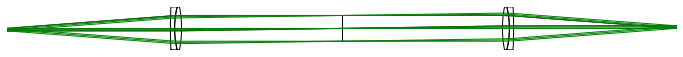

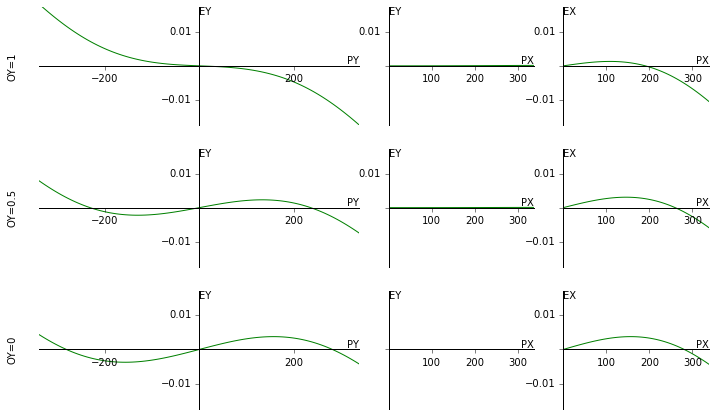

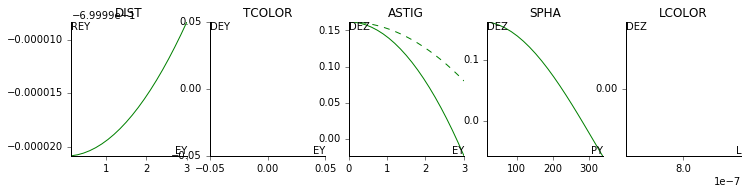

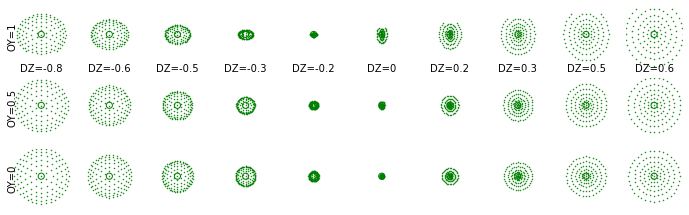

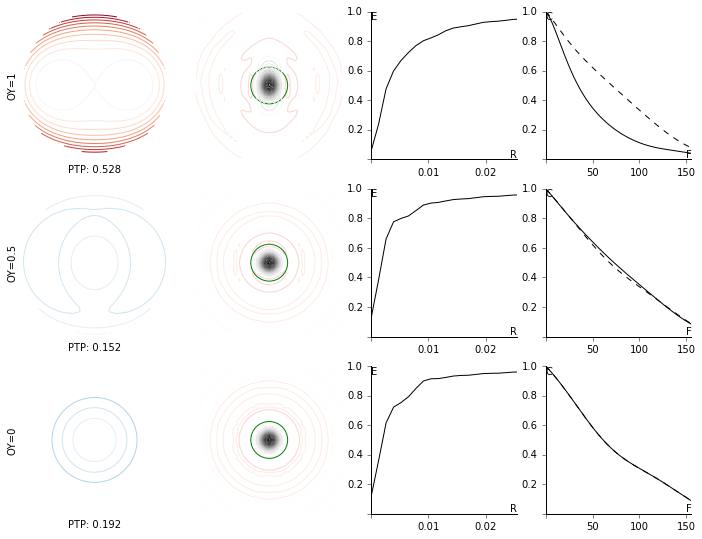

In [8]:
fImage = f1
fObject =f1
f2 = s[-1].distance
with open(p)  as f:
    lens = f.read()
s1 = zemax.zmx_to_system(lens)
s1.reverse()
s1[4].distance = f2
del s1[5]
s2 = zemax.zmx_to_system(lens)
del s2[0:1]

for i in s2:
    s1.append(i)

s1[6].distance = s1[4].distance = f2
s1[1].distance = fImage
s1[9].distance = fObject
s1[-1].radius = 10

s4f = s1
s4f.stop = 5
s4f[4].radius=s4f[5].radius=prc*s4f[1].radius
#s4f[4].radius=prc*s4f[1].radius

s4f.wavelengths = [800e-9]
# %

s4f.object = FiniteConjugate(radius=3,pupil=ro.pupils.RadiusPupil(prc*d_optics))
s4f.image = FiniteConjugate(radius=3,pupil=ro.pupils.RadiusPupil(prc*d_optics))
s4f.object.pupil.telecentric=True
s4f.image.pupil.telecentric=True
s4f.object.pupil.update_radius = True
s4f.image.update_radius=True
s4f.fields = [0,0.5,1]
#s4f.object.pupil.aim=True
s4f.update()

a4f=ro.Analysis(s4f,refocus_full=True,resize_full=False,plot_paraxial=True,defocus=10,print_paraxial=False)

s4funtilt=cp.deepcopy(s4f)

In [47]:
a4f.figures[0].savefig('./'+str(np.random.randint(1e6))+'.eps')
a4f.figures[3].savefig('./'+str(np.random.randint(1e6))+'.eps')
a4f.figures[4].savefig('./'+str(np.random.randint(1e6))+'.eps')

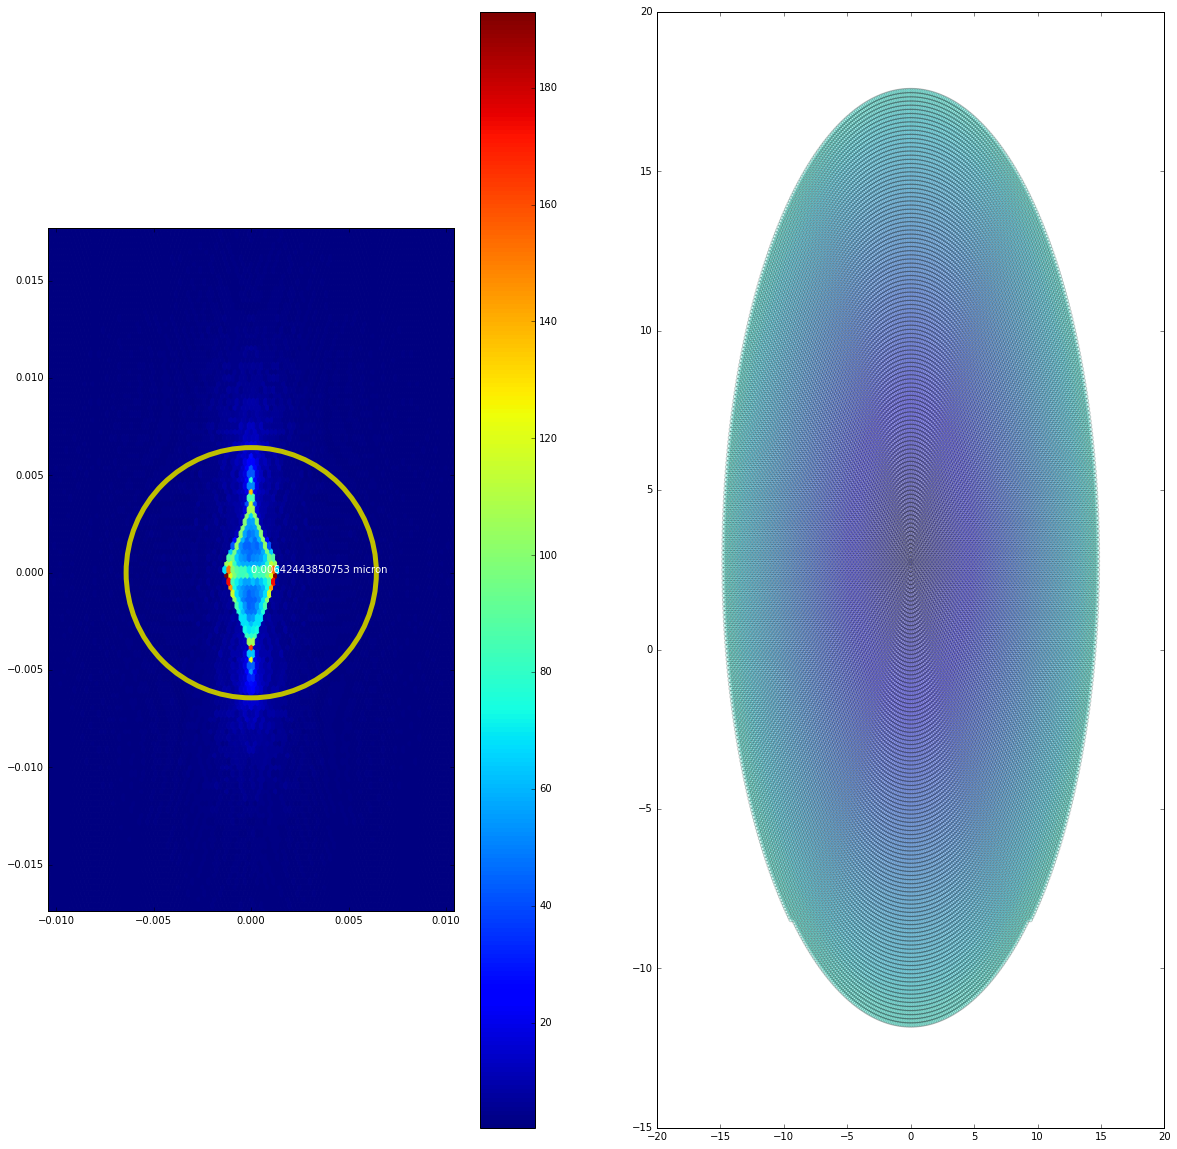

In [48]:

h=1
wi=800e-9
colors="grbcmyk"
t = ro.GeometricTrace(s4funtilt)
t.rays_point((0, h), wi, nrays=40000,
             distribution="hexapolar", clip=True)
# plot transverse image plane hit pattern (ray spot)

fig = plt.figure(figsize=[20,20])
ax=fig.add_subplot(121)
ax.add_patch(patches.Circle((0, 0), r, edgecolor='y',linewidth=5 ,facecolor="none"))
ax.annotate(str(r)+' micron',(0,0),fontsize=10,color='w')
y = t.y[-1, :, :2] - t.y[-1, t.ref, :2]
plt.hexbin(y[:, 0], y[:, 1],vmin=2)
plt.colorbar()
dist0=t.u
ax.set_aspect('equal')
ax=fig.add_subplot(122) 
ax.scatter(t.y[-2, :, 0], t.y[-2, :, 1],c=np.linalg.norm(t.u[-2,:,:2],axis=1),alpha=0.2,vmin=0, vmax=0.2)
#ax.colorbar()

y_untilt=t.y[-1, :, :2] 

plt.savefig('./'+str(np.random.randint(1e6))+'.png')

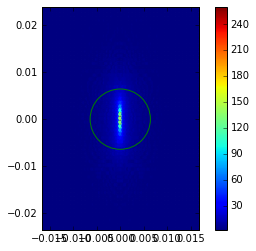

In [49]:
u = ro.utils.tanarcsin(t.i[-1])
zi = s.paraxial.rayleigh_range[1]
yi = y +2*zi*u
r = s4f.paraxial.airy_radius[1]/s4f.paraxial.wavelength*wi
# plot transverse image plane hit pattern (ray spot)

fig,ax=plt.subplots()
ax.add_patch(patches.Circle(
    (0,0), r, edgecolor='g', facecolor="none"))
plt.hexbin(yi[:, 0], yi[:, 1],vmin=2)
plt.colorbar()

ax.set_aspect('equal')



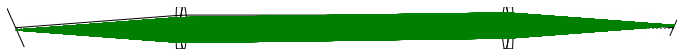

In [56]:
fig, ax = plt.subplots(figsize=(12, 12))
angle=np.deg2rad(24)
na_perc=1
s4f[0].radius=25
s4f[0].angles=(angle,0,0)
s4f[-1].angles=(-angle,0,0)
#s[5].radius=0.6*s[1].radius
s4f.object.pupil.aim=False
s4f.update()
t = ro.GeometricTrace(s4f)
# This only calls the trace init ...copies system to t.system
t.rays_paraxial()
s4f.plot(ax)
s4f.paraxial.plot(ax)
#t.plot(ax)
#n=np.sqrt(n)
#th=np.cos(np.pi/2-na_perc*np.arcsin(s4f.paraxial.numerical_aperture[0]))
#ind0=np.nonzero((np.abs(ufull[:,0])<th)*(np.abs(ufull[:,1])<th)*(ufull[:,2]>0))
#ind0=np.nonzero(((ufull[:,0]**2+ufull[:,1]**2)<th**2)*(ufull[:,2]>0))
#inds=ind0[0]
#print len(inds)
u=dist0[0,:,:]
t.rays_given(([0,-h*s4f.object.radius,0]),s4f[0].to_normal(u))
t.l=800e-9
t.propagate(clip=True)
# Here the propagation for the plot happens:
t.plot(ax)
#print t.y
#plt.show()
#print s
plt.savefig('./'+str(np.random.randint(1e6))+'.png')

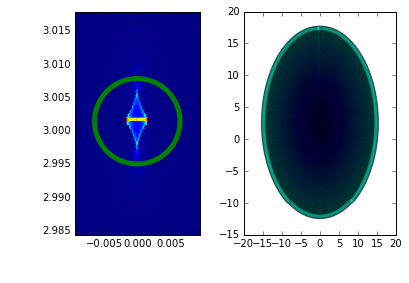

In [57]:
from matplotlib import patches
wi=800e-9
colors="grbcmyk"
t.ref=0
r = s4f.paraxial.airy_radius[1]/s4f.paraxial.wavelength*wi

# plot transverse imageplane hit pattern (ray spot)
y = t.y[-1, :, :2]
y_tilt=t.y[-1, :, :2]
hr=t.y[-1,np.logical_not(np.isnan(t.y[-1, :, 0] )),:]
airycenter=np.mean(hr,axis=0)[:2]
u = ro.utils.tanarcsin(t.i[-1])
fig = plt.figure()
ax=fig.add_subplot(121)
ax.add_patch(patches.Circle(
    airycenter, r, edgecolor='g',linewidth=5 ,facecolor="none"))
ax.set_aspect('equal')
ax.hexbin(y[:, 0], y[:, 1])
ax.add_patch(patches.Circle((0, -h*s4f.object.radius), r, edgecolor='y',linewidth=1 ,facecolor="none"))
ax.annotate(str(r)+' micron',(0,-h*s4f.object.radius),fontsize=10,color='w')
ax=fig.add_subplot(122) 
ax.scatter(t.y[-2, :, 0], t.y[-2, :, 1],c=np.linalg.norm(t.u[-2,:,:2],axis=1),alpha=0.2,vmin=0, vmax=0.2)
#ax.colorbar()

plt.savefig('./'+str(np.random.randint(1e6))+'.png')


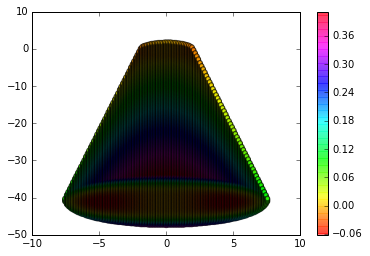

In [58]:
x, y, o = t.opd(100)
plt.scatter(x,y,c=o,cmap='hsv',alpha=0.5)
plt.colorbar()

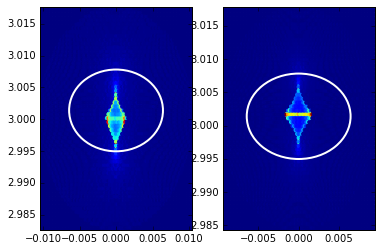

In [59]:
fig=plt.figure()
ax=plt.subplot(121)
plt.hexbin(y_untilt[:,0],y_untilt[:,1])
ax.add_patch(patches.Circle(
    airycenter, r, edgecolor='w',linewidth=2 ,facecolor="none"))
ax=plt.subplot(122)
ax.add_patch(patches.Circle(
    airycenter, r, edgecolor='w',linewidth=2 ,facecolor="none"))
plt.hexbin(y_tilt[:,0],y_tilt[:,1])

plt.savefig('./'+str(np.random.randint(1e6))+'.png')

In [54]:
r

0.0064245570023815255